In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.fftpack
import scipy.io as sio
import copy
import pylab as pl
import time
from IPython import display
from matplotlib.pyplot import figure
from termcolor import colored

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Sep 10 13:57:15 2018', '__version__': '1.0', '__globals__': [], 'origS': array([[15.15191926],
       [15.27258438],
       [15.39588566],
       ...,
       [ 4.9764308 ],
       [ 5.08779166],
       [ 5.20246166]]), 'origT': array([[0.000e+00, 1.000e-03, 2.000e-03, ..., 2.998e+00, 2.999e+00,
        3.000e+00]]), 'signal': array([[15.15191926],
       [        nan],
       [        nan],
       ...,
       [        nan],
       [ 5.08779166],
       [ 5.20246166]]), 'time': array([[0.000e+00, 1.000e-03, 2.000e-03, ..., 2.996e+00, 2.999e+00,
        3.000e+00]])}
dict_keys(['__header__', '__version__', '__globals__', 'origS', 'origT', 'signal', 'time'])
3001


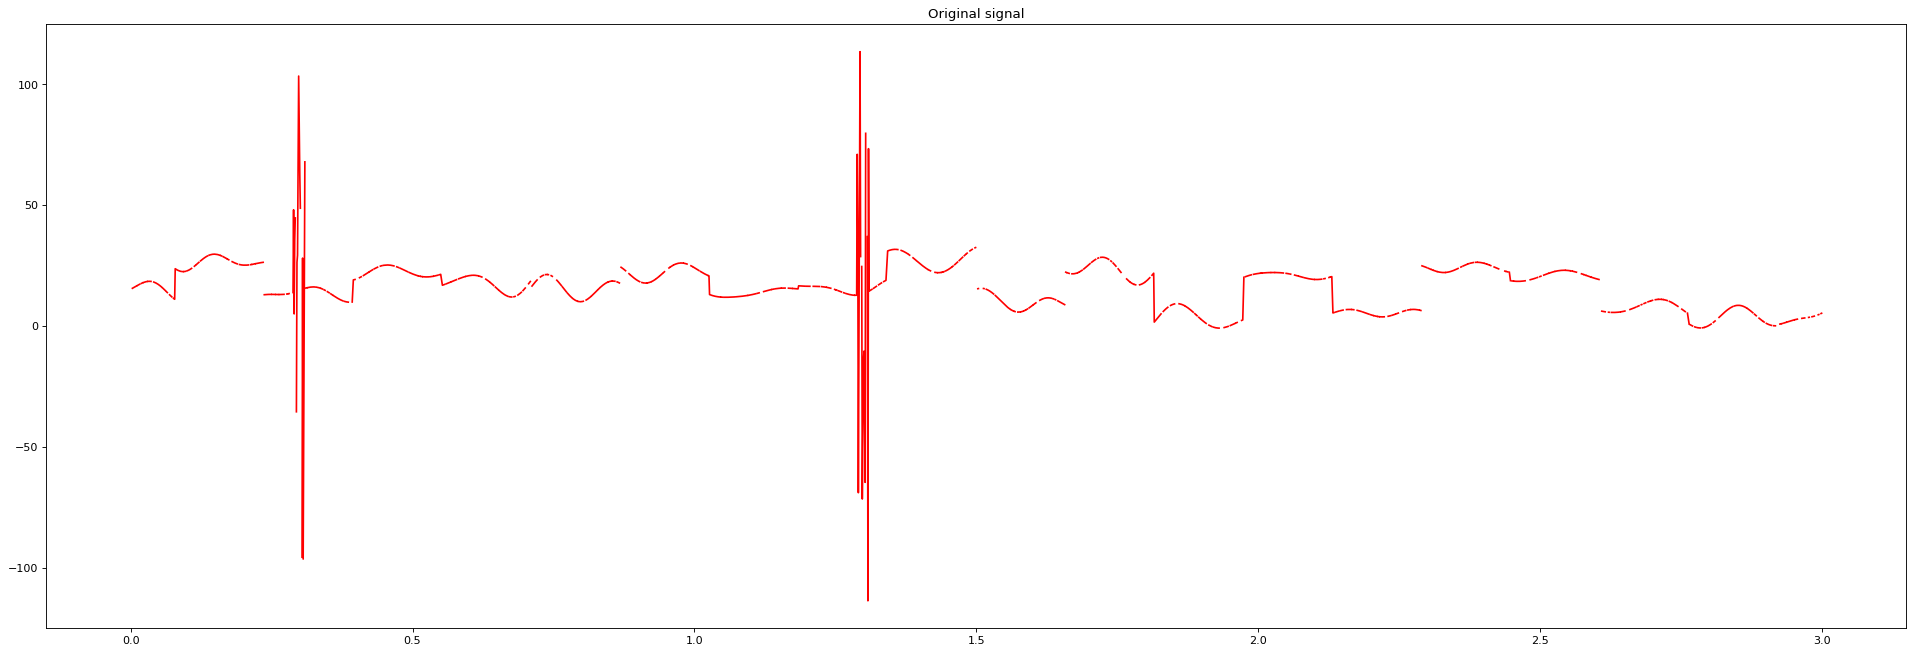

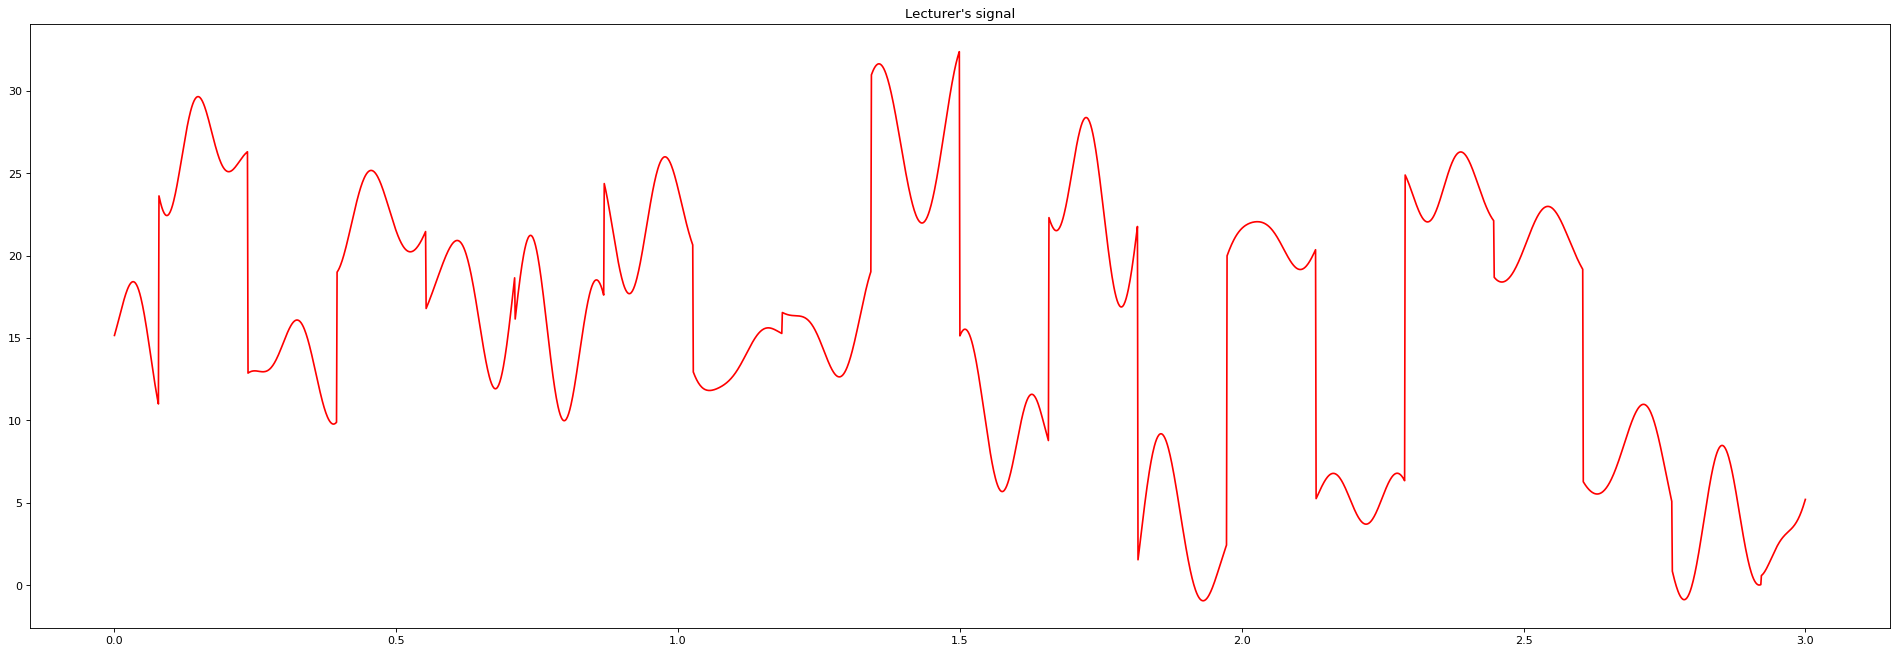

In [179]:
# import data
data = sio.loadmat('./resample_codeChallenge.mat')
print(data)
print(data.keys())

origS = data["origS"]
origT = data["origT"][0]
signal = data["signal"].flatten()
n = len(origS)
time =  data["time"][0]
print(n)

figure(figsize=(30, 10), dpi=80)
plt.plot(time, signal, 'r')
plt.title('Original signal')
plt.show()

figure(figsize=(30, 10), dpi=80)
plt.plot( origT, origS, 'r')
plt.title('Lecturer\'s signal')
plt.show()


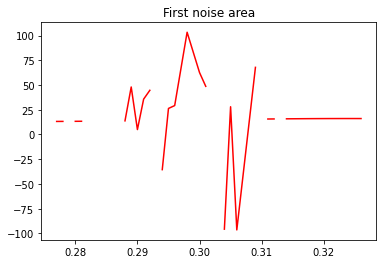

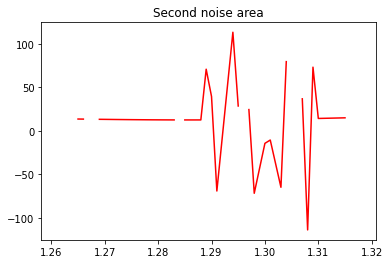

In [180]:

plt.plot(time[220:260], signal[220:260], 'r')
plt.title('First noise area')
plt.show()


plt.plot(time[1000:1050], signal[1000:1050], 'r')
plt.title('Second noise area')
plt.show()

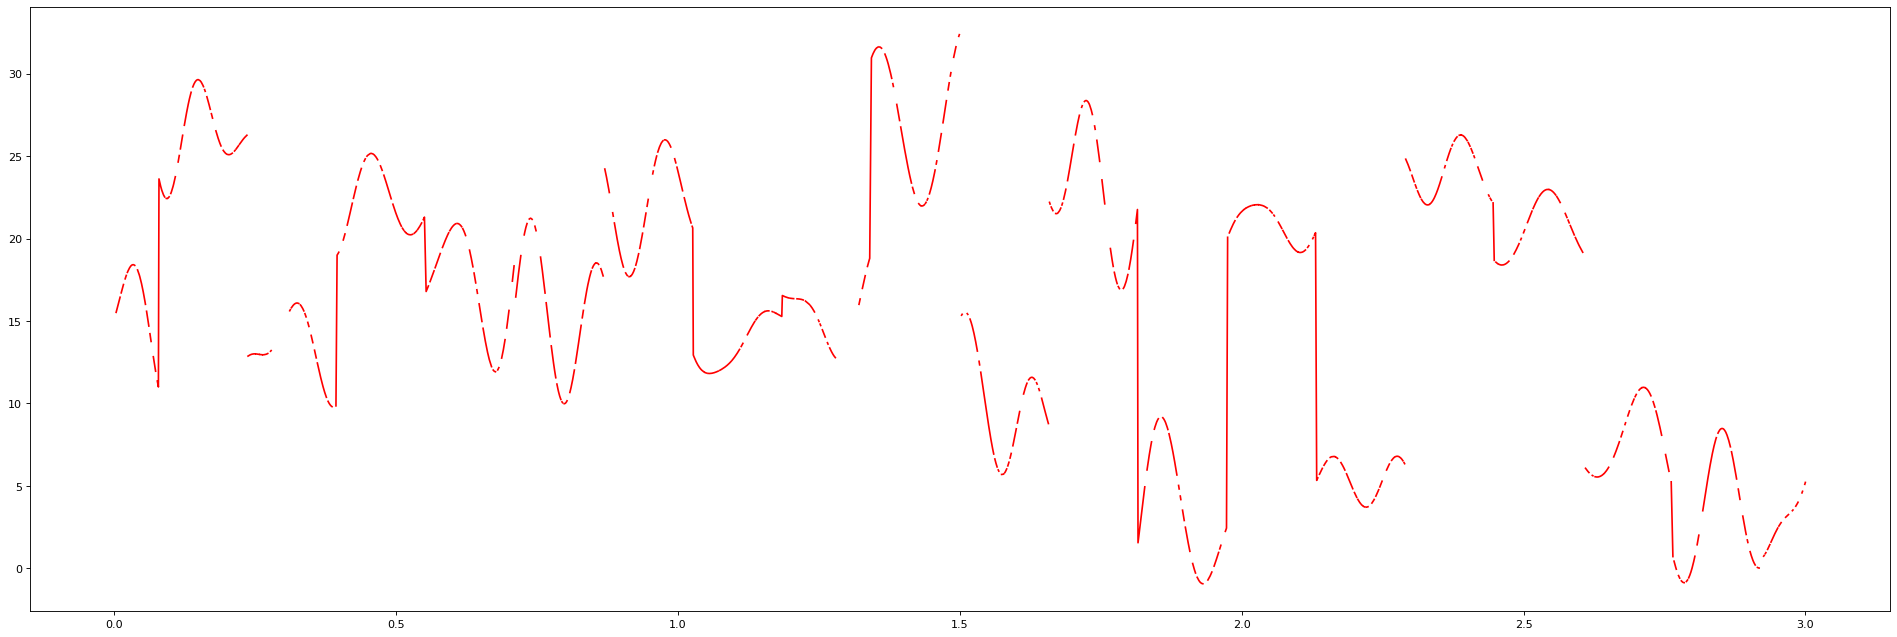

In [181]:
filterS = signal.copy()

for index, t in enumerate(time):
  if 0.28<=t <=0.31 or 1.28 <= t <= 1.32:
    filterS[index] = float("NaN")

boundaries = []
left = -1
for index, value in enumerate(filterS):
  if left == -1 and np.isnan(value):
    continue
  if not np.isnan(value):
    if index - 1 != left and left != -1:
      boundaries.append([left, index])
    left = index


figure(figsize=(30, 10), dpi=80)
plt.plot(time, filterS, 'r')
plt.show()



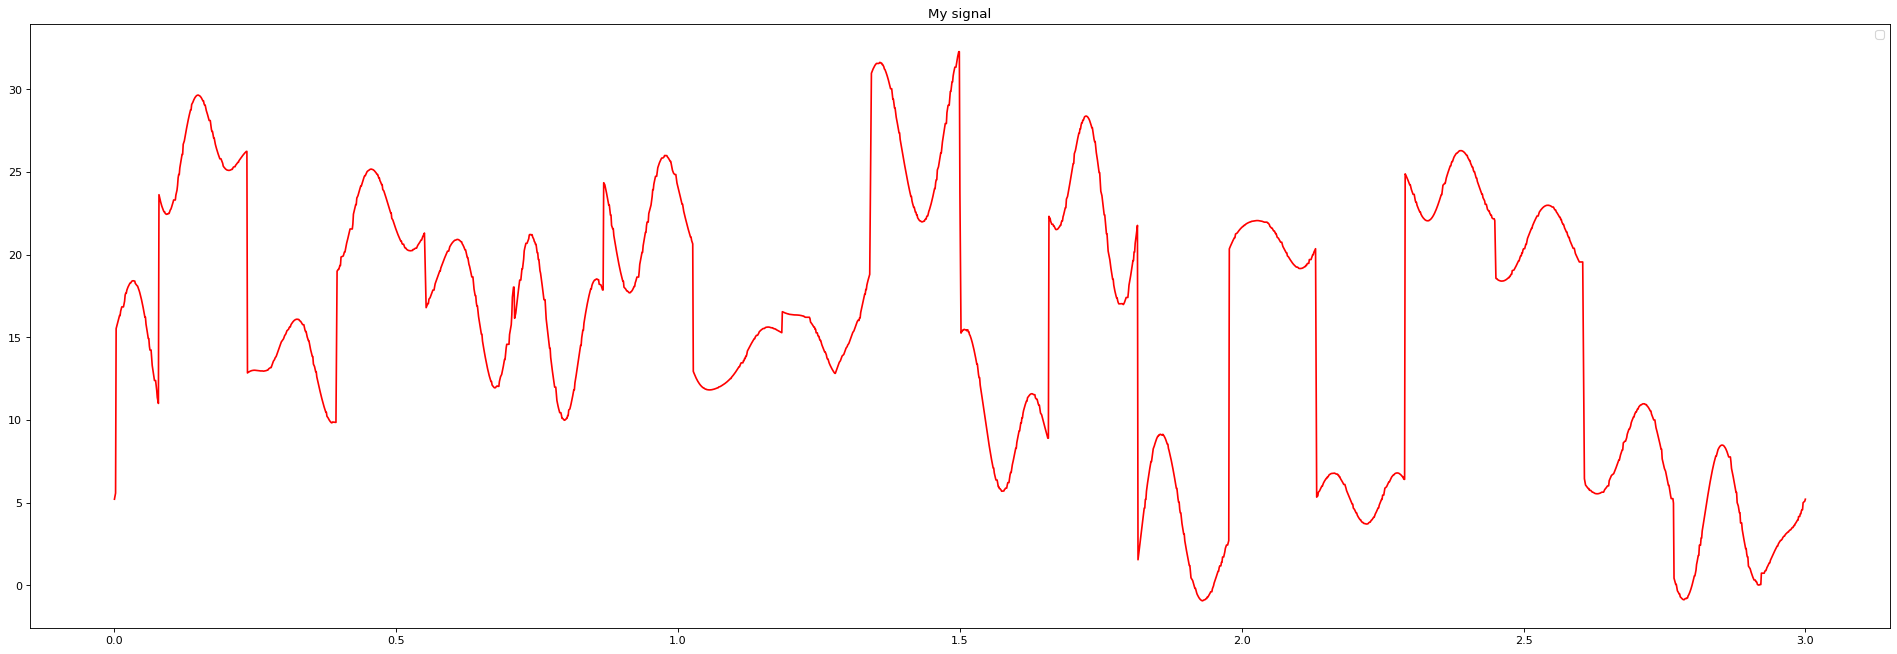

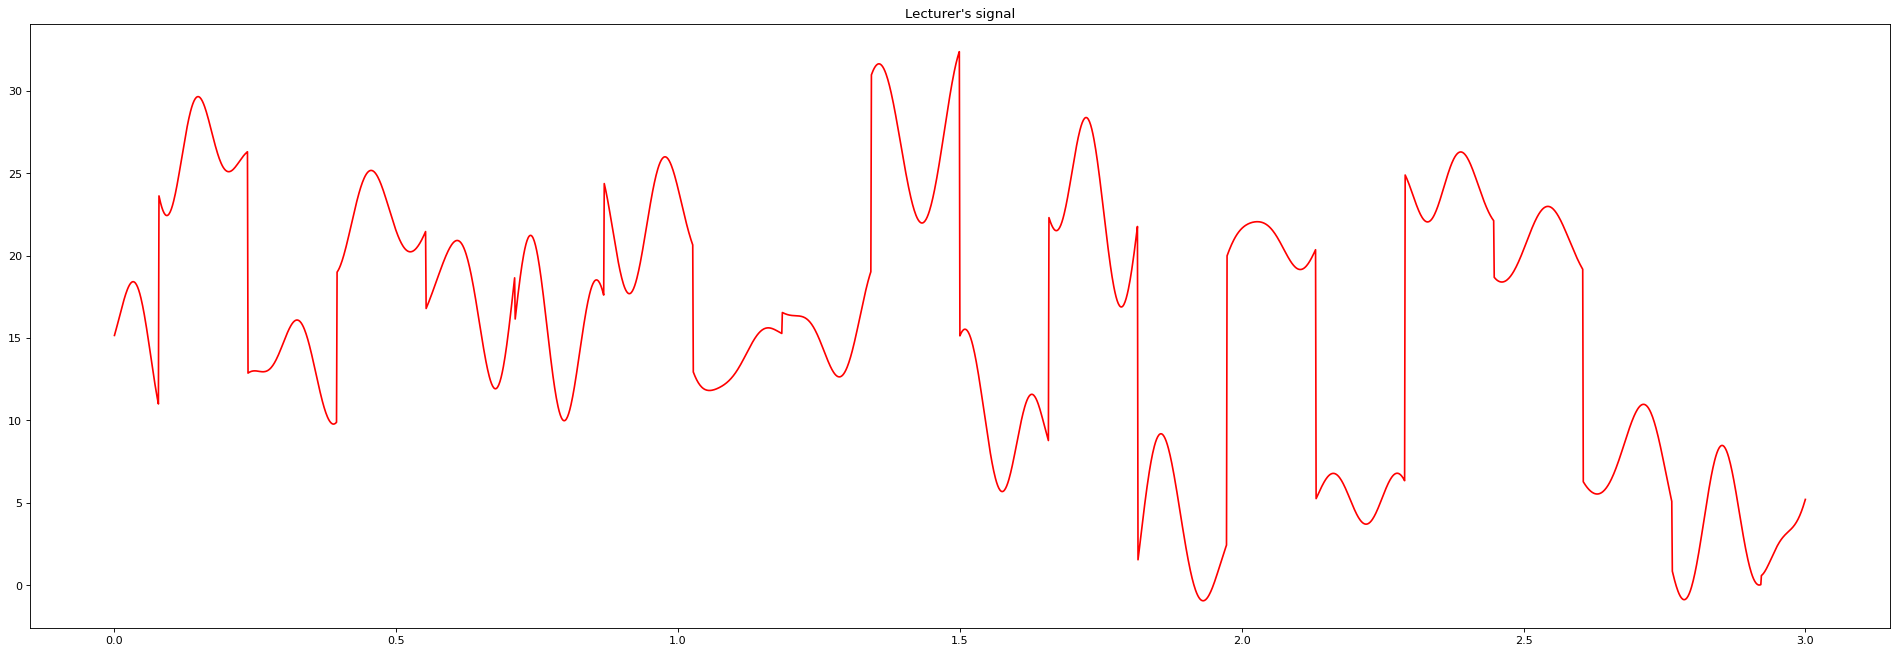

In [182]:
# put the interpolated piece into the signal
filledSignal = copy.deepcopy( filterS )

for boundary in boundaries:
  linedata  = np.linspace(0,1,int(np.diff(boundary))) * (filledSignal[boundary[1]]-filledSignal[boundary[0]]) + filledSignal[boundary[0]-1]
  filledSignal[ range(boundary[0],boundary[1]) ] = linedata

figure(figsize=(30, 10), dpi=80)
plt.plot(time, filledSignal, 'r')
plt.legend()
plt.title('My signal')
plt.show()

figure(figsize=(30, 10), dpi=80)
plt.plot( origT, origS, 'r')
plt.title('Lecturer\'s signal')
plt.show()

 